1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set visualization style
sns.set_style('whitegrid')

2. Data Loading and Initial Exploration

In [ ]:
df = pd.read_csv('Machine_Failure_Prediction_Data.csv')
print("First 5 rows of the dataset:")
display(df.head())
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


3. Exploratory Data Analysis (EDA)

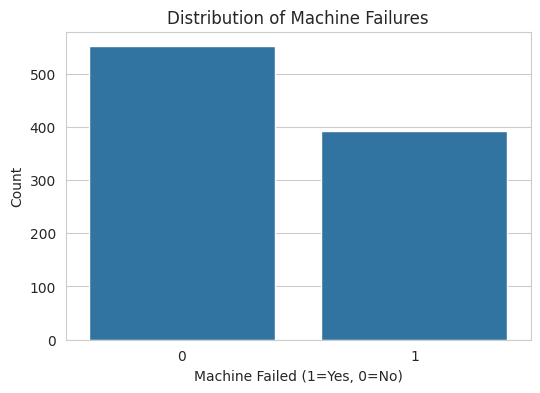

Failure Distribution:
fail
0    0.583686
1    0.416314
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fail', data=df)
plt.title('Distribution of Machine Failures')
plt.xlabel('Machine Failed (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()
print("Failure Distribution:")
print(df['fail'].value_counts(normalize=True))

Feature Relationships

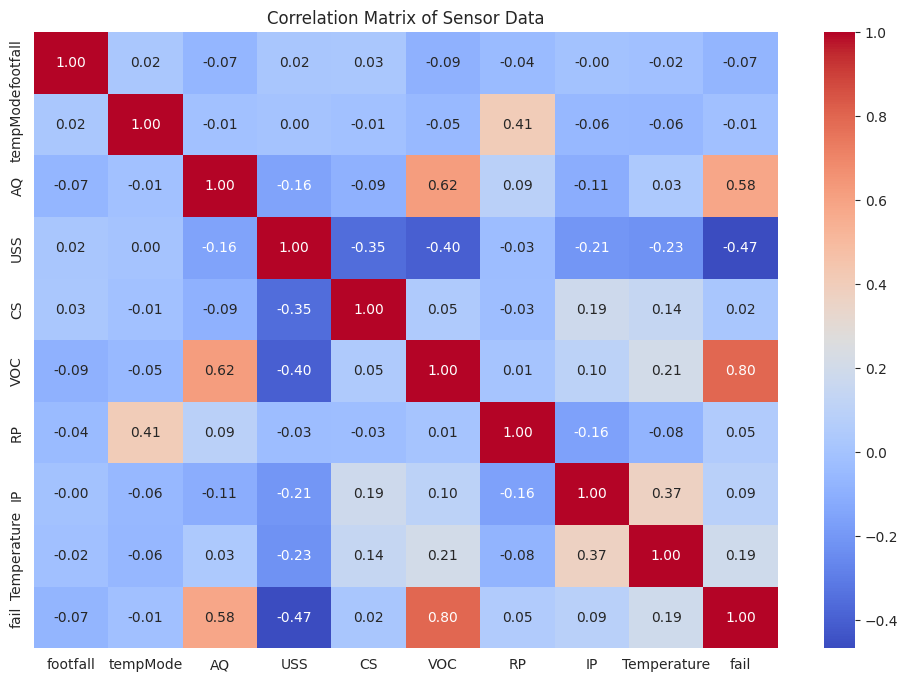

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sensor Data')
plt.show()

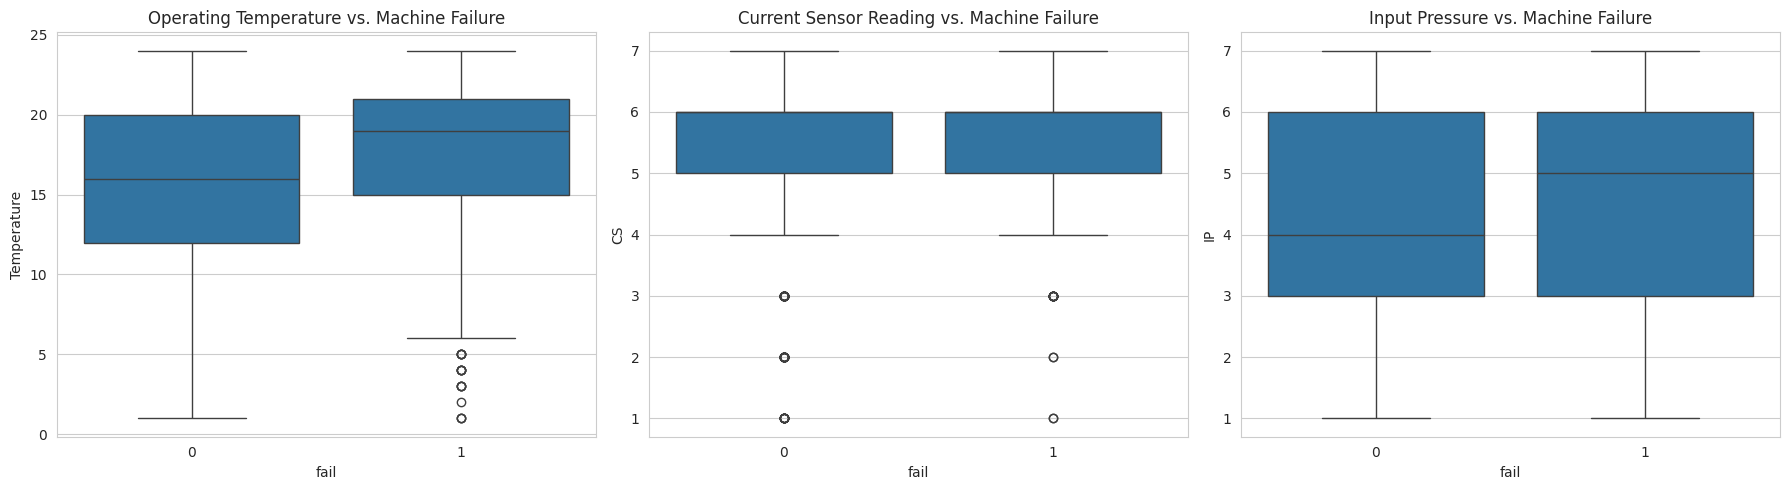

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(ax=axes[0], x='fail', y='Temperature', data=df)
axes[0].set_title('Operating Temperature vs. Machine Failure')
sns.boxplot(ax=axes[1], x='fail', y='CS', data=df)
axes[1].set_title('Current Sensor Reading vs. Machine Failure')
sns.boxplot(ax=axes[2], x='fail', y='IP', data=df)
axes[2].set_title('Input Pressure vs. Machine Failure')
plt.tight_layout()
plt.show()

4. Data Preprocessing and Feature Engineering

In [ ]:
df_processed = pd.get_dummies(df, columns=['tempMode'], drop_first=True)
X = df_processed.drop('fail', axis=1)
y = df_processed['fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

5. Model Building and Training

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Random Forest model trained successfully.")

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9206

Confusion Matrix:
 [[103   7]
 [  8  71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       110
           1       0.91      0.90      0.90        79

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.92      0.92      0.92       189

